<a href="https://colab.research.google.com/github/akhil1198/RL-PA1/blob/main/RL_A1_q_learning_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gymnasium matplotlib numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 KB 17.0 MB/s eta 0:00:00


In [2]:
from google.colab import widgets
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

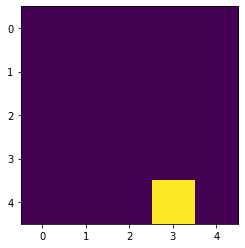

<IPython.core.display.Javascript object>

In [32]:
output_grid = widgets.Grid(1,1)

for _ in range(5):
  grid = np.zeros((5, 5))
  grid[np.random.randint(5), np.random.randint(5)] = 1

  with output_grid.output_to(0,0):
    output_grid.clear_cell()
    plt.imshow(grid)
  time.sleep(2) 

Creating an Environment with all the actions, states, rewards and positions

In [44]:
from IPython.utils.path import random
class GridEnv(gym.Env):
  def __init__(self, env_type):
    self.environment_type = env_type
    self.environment_width = 5
    self.environment_height = 5
    self.observation_space = spaces.Discrete(25)
    self.action_space = spaces.Discrete(4)

    self.timestep = 0
    self.max_timesteps = 15

    self.agent_pos = [0, 0]
    self.goal_pos = [4, 4]

    self.state = np.zeros((5,5))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5

    self.reward = 0
    self.truncated = False
    self.terminated = False
    self.reward_pos = np.asarray([[0, 4], [2, 1], [3, 4], [4, 2]])
    self.negreward_pos = np.asarray([[1, 2], [3, 0], [3, 3]])

    #for stochastic env
    self.random_number = 0
    self.rand_action = 0

  def reset(self):
    self.state = np.zeros((5,5))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5
    observation = self.state.flatten()

    return observation, self.agent_pos
  
  def step(self, action):
    print("action", action)
    # action = int(action)
    if action == 0:
      #print("at 0 - > agent_pos[0] += 1")
      self.agent_pos[0] += 1
    if action == 1:
      #print("at 1 -> agent_pos[0] -= 1")
      self.agent_pos[0] -= 1
    if action == 2:
      #print("at 2 -> agent_pos[1] += 1")
      self.agent_pos[1] += 1
    if action == 3:
      #print("at 3 -> agent_pos[1] -= 1")
      self.agent_pos[1] -= 1
    #stochastic method
    if self.environment_type == "stochastic":
      self.random_number = np.random.rand()
      self.rand_action = np.random.randint(4)
      if self.random_number < 0.9:
        #print("Executing the right action -> ", action)
        if action == 0:
          #print("at 0 - > agent_pos[0] += 1")
          self.agent_pos[0] += 1
        if action == 1:
          #print("at 1 -> agent_pos[0] -= 1")
          self.agent_pos[0] -= 1
        if action == 2:
          #print("at 2 -> agent_pos[1] += 1")
          self.agent_pos[1] += 1
        if action == 3:
          #print("at 3 -> agent_pos[1] -= 1")
          self.agent_pos[1] -= 1
      elif self.random_number > 0.9:
        #print("Executing Random Action", self.rand_action)
        if self.rand_action == 0:
          self.agent_pos[0] += 1
        if self.rand_action == 1:
          self.agent_pos[0] -= 1
        if self.rand_action == 2:
          self.agent_pos[1] += 1
        if self.rand_action == 3:
          self.agent_pos[1] -= 1
      
    #print(self.agent_pos)
    #Comment this to demonstrate the truncation condition.
    self.agent_pos = np.clip(self.agent_pos, 0, 4)

    self.state = np.zeros((5,5))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5
    observation = self.state.flatten()

    self.reward = 0
    #[0, 4], [2, 1], [3, 4], [4, 2]
    if np.array_equal(self.agent_pos, self.reward_pos[0]):
      self.reward = self.reward + 2
    
    if np.array_equal(self.agent_pos, self.reward_pos[1]):
      self.reward = self.reward + 4
    
    if np.array_equal(self.agent_pos, self.reward_pos[2]):
      self.reward = self.reward + 8
    
    if np.array_equal(self.agent_pos, self.reward_pos[3]):
      self.reward = self.reward + 6
    

    if np.array_equal(self.agent_pos, self.goal_pos):
      self.reward += 100
    

    #[1, 2], [3, 0], [3, 3]
    if np.array_equal(self.agent_pos, self.negreward_pos[0]):
      self.reward = self.reward - 5
    
    if np.array_equal(self.agent_pos, self.negreward_pos[1]):
      self.reward = self.reward - 6
    
    if np.array_equal(self.agent_pos, self.negreward_pos[2]):
      self.reward = self.reward - 2 

    self.timestep += 1

    #print("truncated -> ", self.agent_pos,)
    terminated = True if self.timestep >= self.max_timesteps else False
    truncated = True if np.all((self.agent_pos[0] >= 0) & (self.agent_pos[0] <= 4) & (self.agent_pos[1] >= 0) & (self.agent_pos[1] <= 4)) else False

    info = {}
    
    return observation, self.reward, terminated, truncated, info, self.agent_pos

  def render(self):
    print("Reward -> ", self.reward)
    plt.imshow(self.state)
    


Creating a Random Agent 

In [34]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space
  def step(self, obs):
    return np.random.choice(self.action_space.n)
  

Starting the execution by calling all the methods in the Environment until termination of process

Deterministic Environment: 

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reward ->  0


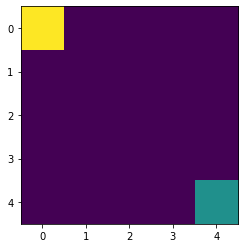

<IPython.core.display.Javascript object>

In [35]:
env = GridEnv(env_type = "deterministic")
agent = RandomAgent(env)

obs, info = env.reset()
terminated, truncated = False, False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

while not terminated:
  action = agent.step(obs)
  #action = input()
  observation, reward, terminated, truncated, info, agent_pos = env.step(action)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    plt.imshow(grid)
    env.render()
  time.sleep(1)


************************************************************************
Stochastic Environment: 

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reward ->  0


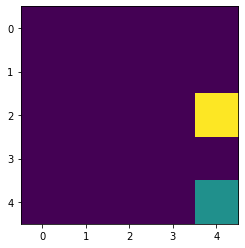

<IPython.core.display.Javascript object>

In [36]:
env = GridEnv(env_type = "stochastic")
agent = RandomAgent(env)

obs, info = env.reset()
terminated, truncated = False, False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

while not terminated:
  action = agent.step(obs)
  #action = input()
  observation, reward, terminated, truncated, info, agent_pos = env.step(action)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    plt.imshow(grid)
    env.render()
  time.sleep(1)

**Q-Learning**

In [37]:
import random
from IPython.display import clear_output

env = GridEnv(env_type = "deterministic")
agent = RandomAgent(env)

# Hyperparameters
alpha = 0.15
gamma = 0.93
epsilon = 1.0
num_episodes = 500

# For plotting metrics
all_epochs = []
all_penalties = []

#Q-Table
q_table = np.random.rand(25, 4)
q_table = q_table.astype(int)


# num_rows = 5
# num_cols = 5

# state_to_index = {}
# for i in range(num_rows):
#     for j in range(num_cols):
#         state = (i, j)
#         index = i * num_cols + j
#         state_to_index[state] = index

# print(state_to_index)

#running for 1000 episodes
for episode in range(1000):
  #resetting the state 
  state, agent_pos = env.reset()
  # print(agent_pos)
  epochs = 0
  penalties = 0
  reward = 0

  index 
  state_to_list = state.tolist()
  if 1 in state_to_list:
    index = state_to_list.index(1)
  # print(index)
  
  for timestep in range(20):
    # print("agent_pos", agent_pos)
    # agent_pos = agent_pos.ravel()
    # agent_pos = agent_pos.astype(int)
    # index = state_to_index[(agent_pos[0], agent_pos[1])]
    #Choosing an action based on e-greedy policy
    # print("agent_pos ", agent_pos, "index ", index)
    if np.random.rand() < epsilon:
      action = np.random.choice(env.action_space.n)
    else:
      action = np.argmax(q_table[index])

    action = np.clip(action, 0, 3)
    # print(action)
    observation, reward, terminated, truncated, info, new_agent_pos = env.step(action)

    # print(observation)

    new_state_to_list = observation.tolist()
    if 1 in new_state_to_list:
      index2 = new_state_to_list.index(1)
    # print(index2)

    # print(is_present)
    # index2 = np.where(observation == 1)
    # print(index2)

    # next_st = observation.ravel()
    # next_st = next_st.astype(int)

    # print(epsilon)

    q_table[index, action] = q_table[index, action] + alpha * (reward + gamma * np.max(q_table[index2]) - q_table[index, action])
    # # q_table[agent_pos, action] = new_value

    # if reward == -5 or reward == -6 or reward == -2:
    #   penalties += 1
    
    # agent_pos = new_agent_pos
    # epochs += 1
  epsilon *= 0.995
  # print(epsilon)

print("Q-Table : ", q_table)

Q-Table :  [[ 149   31   32   59]
 [  50   13   29    2]
 [  23   20   20   18]
 [   0   18   15   10]
 [ 476  249  280  283]
 [ 171   42   49   85]
 [  25   24   23   21]
 [  68   20   69   13]
 [  37   39   32   21]
 [ 406  267  482  236]
 [   0    0    0    0]
 [  24   38   32   35]
 [  41   31   67   23]
 [   4  116  249    3]
 [1081  722  939  600]
 [ 339  279  471  238]
 [  67   42   92   17]
 [ 648  379  175   76]
 [ 682  405  602  546]
 [1117  932 1115  930]
 [ 278  234  377  249]
 [ 620  429  923  487]
 [ 728  585  665  531]
 [1179  984 1236 1005]
 [   0    0    0    0]]


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

action 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

action 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

action 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

action 1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

action 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

action 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

action 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

action 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

action 1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

action 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

action 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

action 1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

action 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

action 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

action 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

action 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

action 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

action 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

action 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

action 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

action 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

action 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

action 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

action 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

action 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reward ->  100


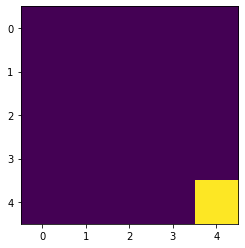

<IPython.core.display.Javascript object>

In [80]:
env = GridEnv(env_type = "deterministic")
agent = RandomAgent(env)

obs, info = env.reset()
terminated, truncated = False, False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

# q_table = q_table.tolist()

# print(q_table)
# max_indices = q_table.argmax(axis=1)
# print(max_indices)
# for sub_arr in q_table:
#   # max_indices = sub_arr.index[max(sub_arr)]
#   # print(max_indices)
#   max_val = max(sub_arr)
#   print(type(max_val))

def get_max_val(arg):
  return max(arg)
  
for i in q_table:
  max_val = get_max_val(i)
  max_index = i.index(max_val)
  # print(max_index)
  observation, reward, terminated, truncated, info, agent_pos = env.step(max_index)
  # observation, reward, terminated, truncated, info, agent_pos = env.step(action)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    plt.imshow(grid)
    env.render()
  time.sleep(1)

  

In [30]:
# env = GridEnv(env_type = "deterministic")
# agent = RandomAgent(env)

# obs, info = env.reset()
# terminated, truncated = False, False

# output_grid = widgets.Grid(1, 1)
# with output_grid.output_to(0, 0):
#   env.render()





# while not terminated:
#   # action = agent.step(obs)
#   for sub_arr in q_table:
#     max_val = max(sub_arr)
#     action = max_val
#   #action = input()
#   observation, reward, terminated, truncated, info, agent_pos = env.step(action)
#   with output_grid.output_to(0, 0):
#     output_grid.clear_cell()
#     plt.imshow(grid)
#     env.render()
#   time.sleep(1)

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NameError: ignored